## 生成快递业务量与快递量之间的图像对比

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, LSTM, Dropout, Attention, AdditiveAttention, Layer, Input, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error, r2_score
import keras.backend as K
import matplotlib
# 让绘图时显示中文
matplotlib.rc("font",family='MicroSoft YaHei',weight="bold")


In [3]:
# 图形绘制函数
def compare_data(datas,labels, title='', xlabel='', ylabel=''):#datas为数据集，其中第一列为日期，第二列为业务量，第三列为快递量
    plt.plot(datas[:,0], datas[:,1], label=labels[0])
    plt.plot(datas[:,0], datas[:,2], label=labels[1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
# 处理后数据导入与展示
index = pd.read_csv('D:\Codes\Python\pythonProject\\test/multi_models/业务量与快递量对比.csv')

In [5]:
data = index
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m')   #格式转化
labels = ['快递业务量', '快递量']

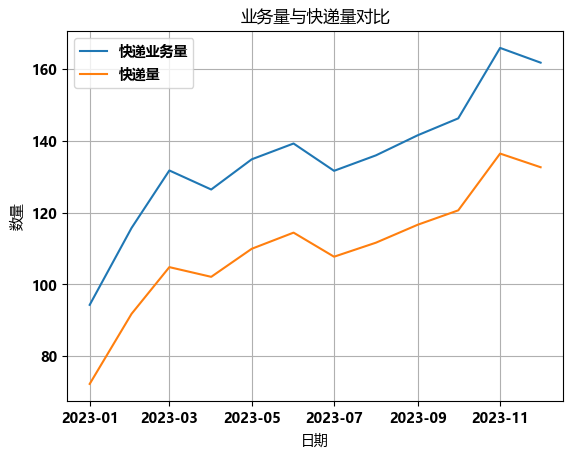

In [11]:
compare_data(data.values, labels, title='业务量与快递量对比', xlabel='日期', ylabel='数量')

In [12]:
# 绘制激活函数图像
def plot_activation(activation, title):
    plt.figure(figsize=(8, 6))
    x = np.linspace(-10, 10, 100)
    y = activation(x)
    plt.plot(x, y)
    plt.title('激活函数 '+title)
    plt.grid(True)
    plt.show()
def plot_activation_all():
    plot_activation(tf.nn.relu, 'ReLU')
    plot_activation(tf.nn.sigmoid, 'Sigmoid')
    plot_activation(tf.nn.tanh, 'Tanh')
    plot_activation(tf.nn.softmax, 'Softmax')
    plot_activation(np.sign, 'Sign')

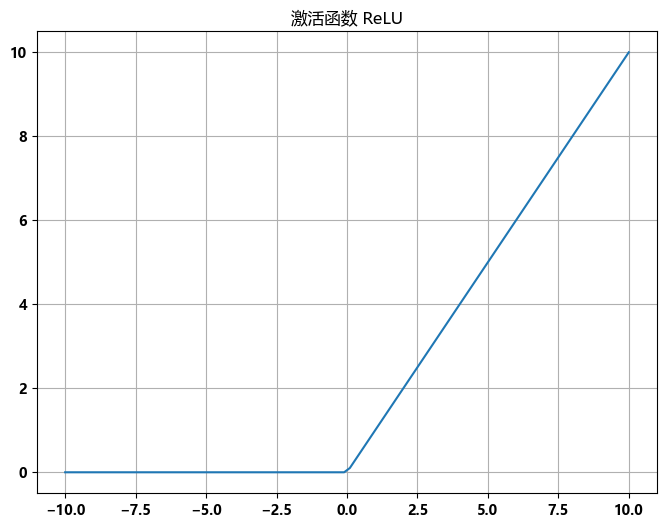

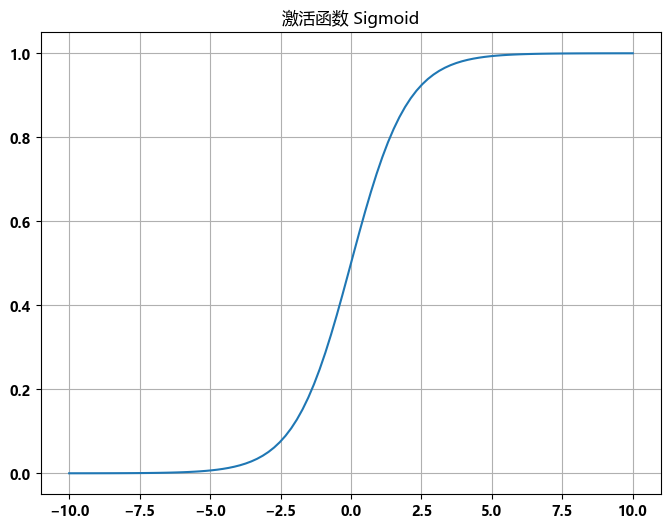

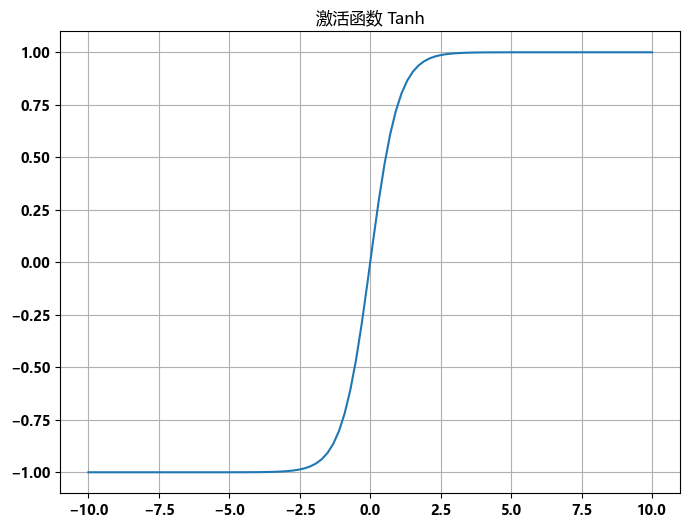

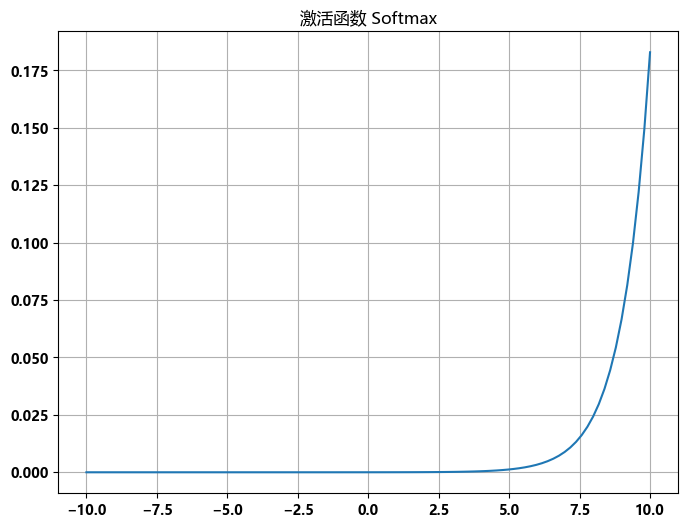

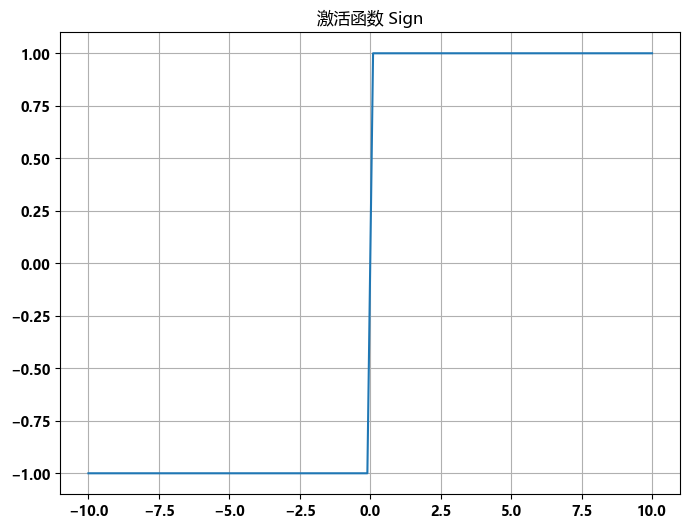

In [13]:
plot_activation_all()

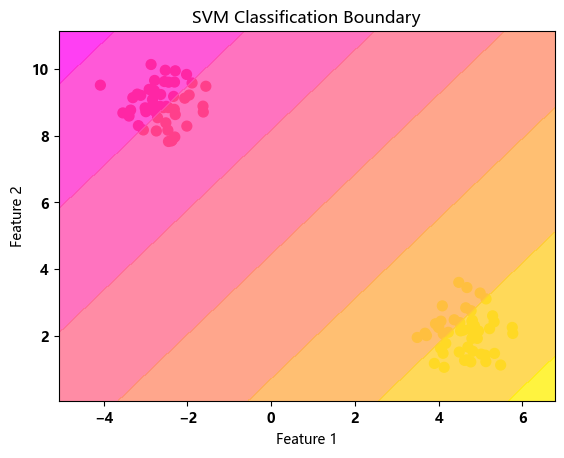

In [18]:
# 构造SVM与SVR分类对照图像# 生成模拟数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 生成模拟数据
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=0.60)
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# 绘制决策边界
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
xlim = X[:, 0].min() - 1, X[:, 0].max() + 1
ylim = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='spring', alpha=0.8)
plt.title('SVM Classification Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



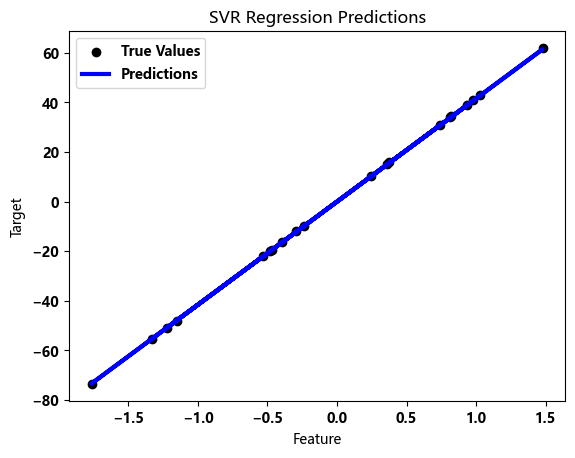

In [17]:

# 生成模拟数据
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练SVR模型
regressor = svm.SVR(kernel='linear', C=1)
regressor.fit(X_train, y_train)

# 预测
y_pred = regressor.predict(X_test)

# 绘制预测曲线
plt.scatter(X_test, y_test, color='black', label='True Values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('SVR Regression Predictions')
plt.show()
